In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
cars_data = pd.read_csv('cars_sampled.csv')

In [6]:
cars= cars_data.copy()

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [9]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)

In [10]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [11]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']

In [12]:
cars=cars.drop(columns=col,axis=1)

In [13]:
cars.drop_duplicates(keep='first',inplace=True)

In [14]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [15]:
#variable year of registration
yearwise_count =cars['yearOfRegistration'].value_counts().sort_index()
print(sum(cars['yearOfRegistration'] > 2018))
print(sum(cars['yearOfRegistration'] < 1950))


26
38


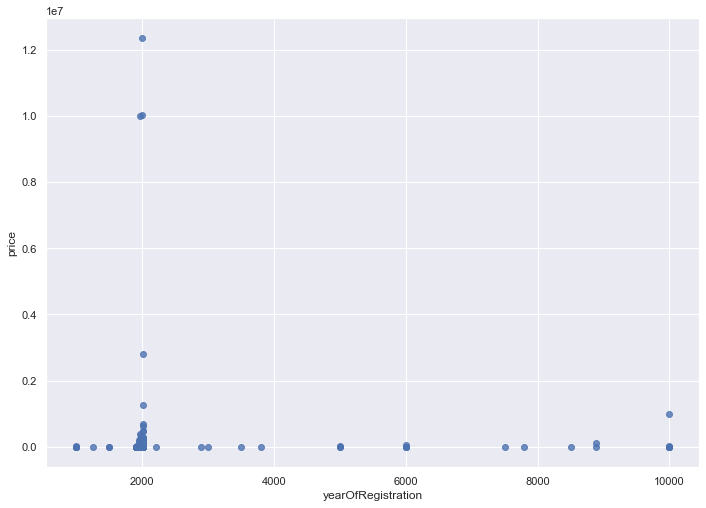

In [16]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

In [17]:
#choose working range -1950 and 2018

In [18]:
#variable price
price_count =cars['price'].value_counts().sort_index()

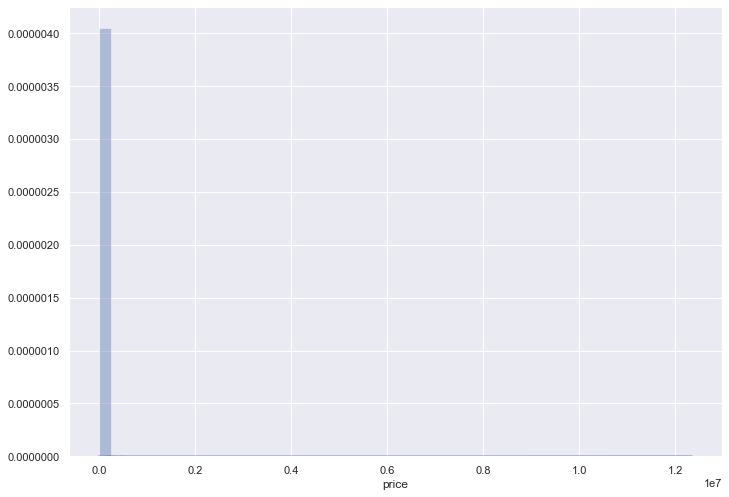

In [19]:
sns.distplot(cars['price'])

In [20]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

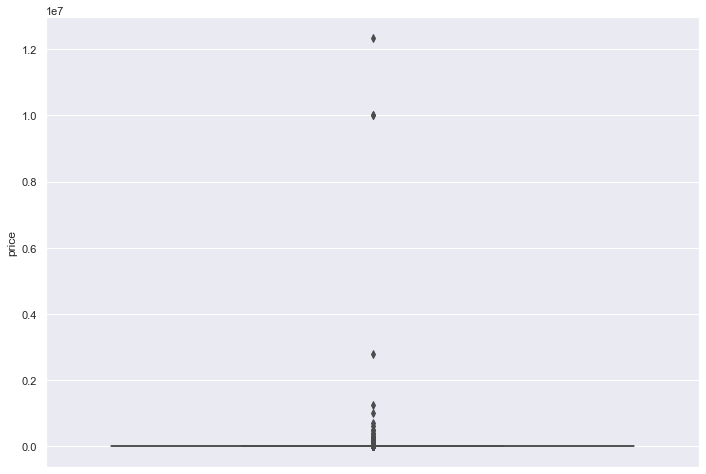

In [21]:
sns.boxplot(y=cars['price'])

In [22]:
print(sum(cars['price']> 150000))
print(sum(cars['price']<100))

34
1748


In [23]:
#working range from 100 to 150000

In [24]:
#variable power ps
power_count=cars['powerPS'].value_counts().sort_index()

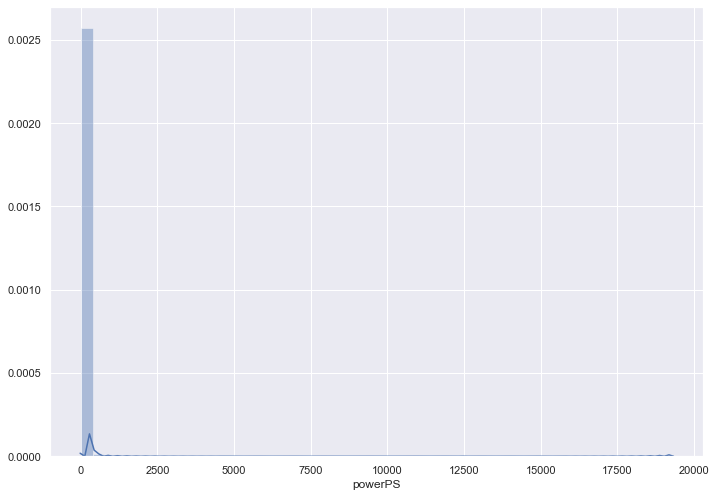

In [25]:
sns.distplot(cars['powerPS'])

In [26]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

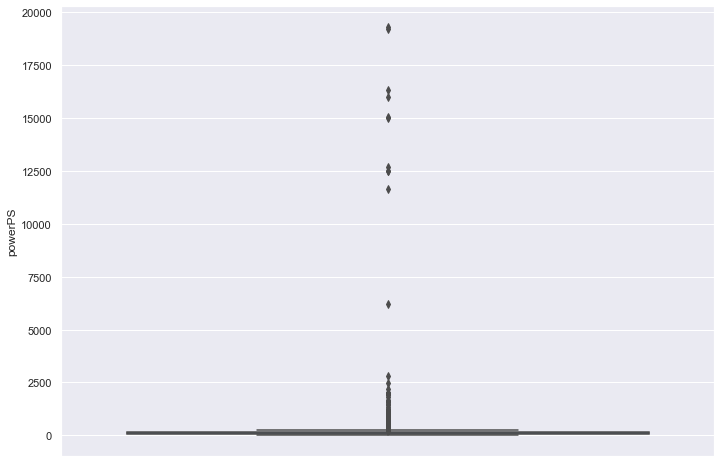

In [27]:
sns.boxplot(y=cars['powerPS'])

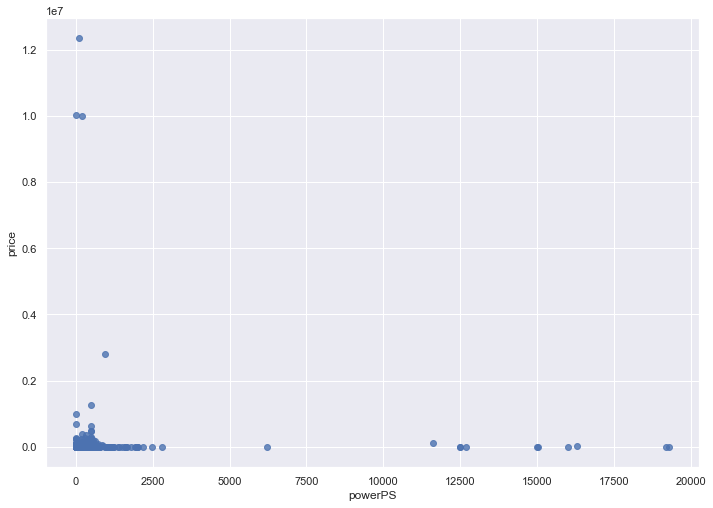

In [28]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [29]:
print(sum(cars['powerPS']>500))
print(sum(cars['powerPS']<10))

115
5565


In [30]:
#working range - 10 and 500

In [31]:
#working range of data

In [32]:
cars = cars[
    (cars.yearOfRegistration<=2018)
    &(cars.yearOfRegistration >= 1950)
    &(cars.price >= 100)
    &(cars.price <= 150000)
    &(cars.powerPS >= 10)
    &(cars.powerPS <= 500)]

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               42772 non-null  object
 1   offerType            42772 non-null  object
 2   price                42772 non-null  int64 
 3   abtest               42772 non-null  object
 4   vehicleType          39896 non-null  object
 5   yearOfRegistration   42772 non-null  int64 
 6   gearbox              41978 non-null  object
 7   powerPS              42772 non-null  int64 
 8   model                41089 non-null  object
 9   kilometer            42772 non-null  int64 
 10  monthOfRegistration  42772 non-null  int64 
 11  fuelType             40175 non-null  object
 12  brand                42772 non-null  object
 13  notRepairedDamage    36495 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [34]:
# 6700 records are dropped in cars data set
#furthur to simplify -variablre reduction
#combining year of registration and month of registration
cars['monthOfRegistration']/=12

In [35]:
#crating a new variable called age by adding year of registration and month of registration
cars['Age']=(2018 -cars['yearOfRegistration'])+cars['monthOfRegistration']


In [36]:
cars['Age'].head()

0   15.250
1   13.500
2   15.917
3   13.000
4   10.917
Name: Age, dtype: float64

In [37]:
cars['Age']=round(cars['Age'],2)

In [38]:
cars['Age'].head()

0   15.250
1   13.500
2   15.920
3   13.000
4   10.920
Name: Age, dtype: float64

In [39]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [40]:
#dropping year of registration and month of registration
cars =cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)


In [41]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller             42772 non-null  object 
 1   offerType          42772 non-null  object 
 2   price              42772 non-null  int64  
 3   abtest             42772 non-null  object 
 4   vehicleType        39896 non-null  object 
 5   gearbox            41978 non-null  object 
 6   powerPS            42772 non-null  int64  
 7   model              41089 non-null  object 
 8   kilometer          42772 non-null  int64  
 9   fuelType           40175 non-null  object 
 10  brand              42772 non-null  object 
 11  notRepairedDamage  36495 non-null  object 
 12  Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 4.6+ MB


In [42]:
#visualising parameters

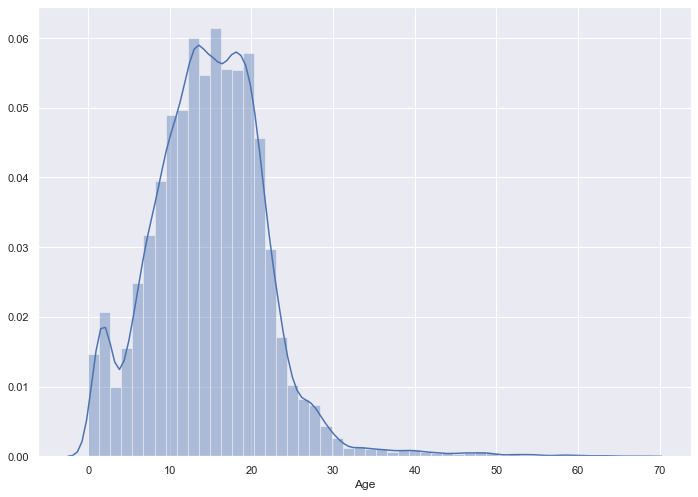

In [43]:
sns.distplot(cars['Age'])

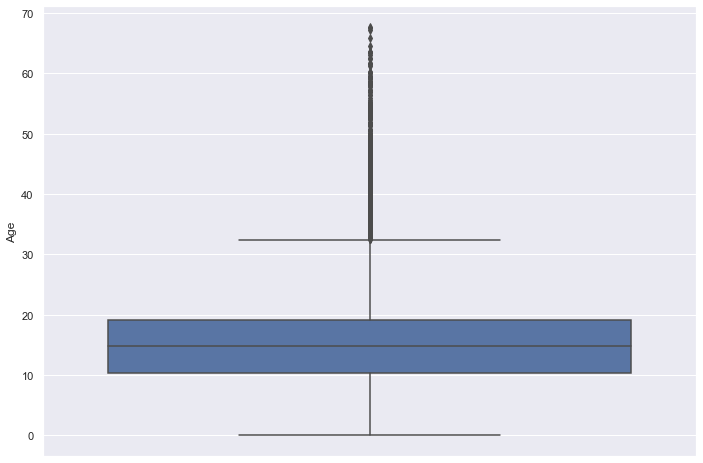

In [44]:
sns.boxplot(y=cars['Age'])

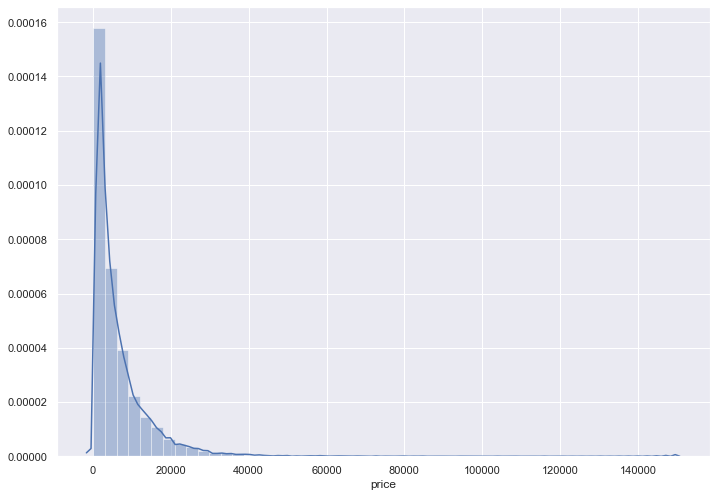

In [45]:
#price
sns.distplot(cars['price'])

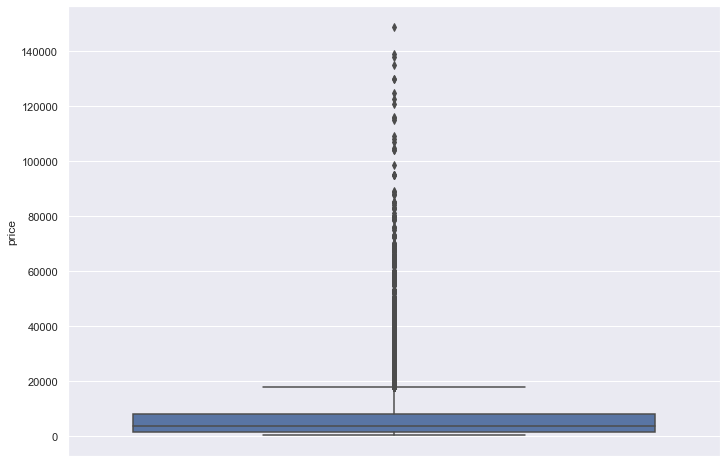

In [46]:
sns.boxplot(y=cars['price'])

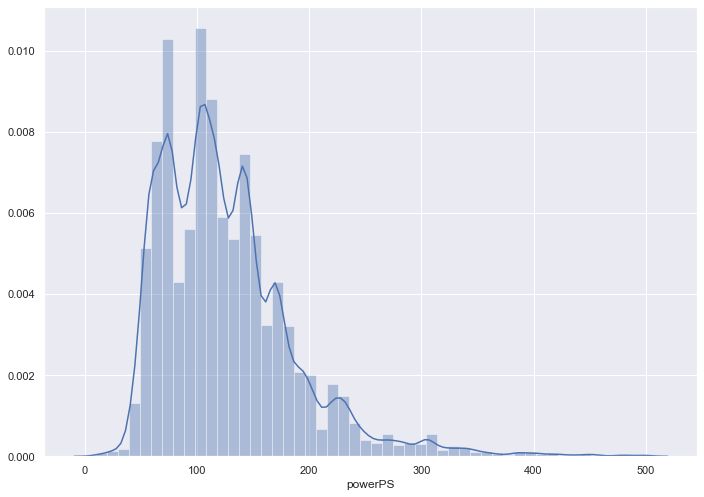

In [47]:
#power PS
sns.distplot(cars['powerPS'])

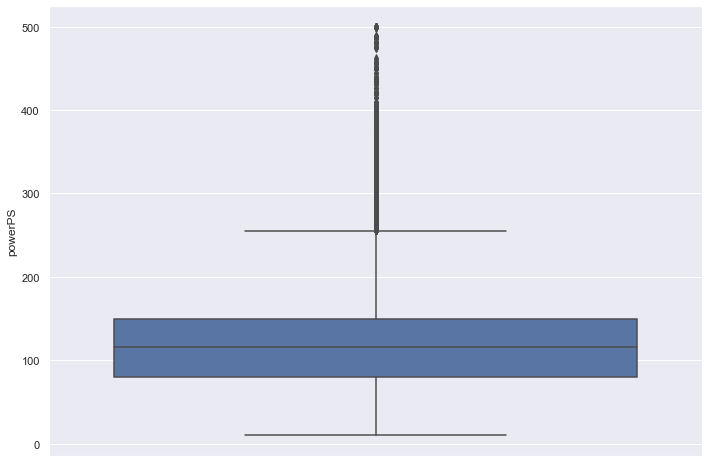

In [48]:
sns.boxplot(y=cars['powerPS'])


In [49]:
#visualising the parameters after narrowing working range


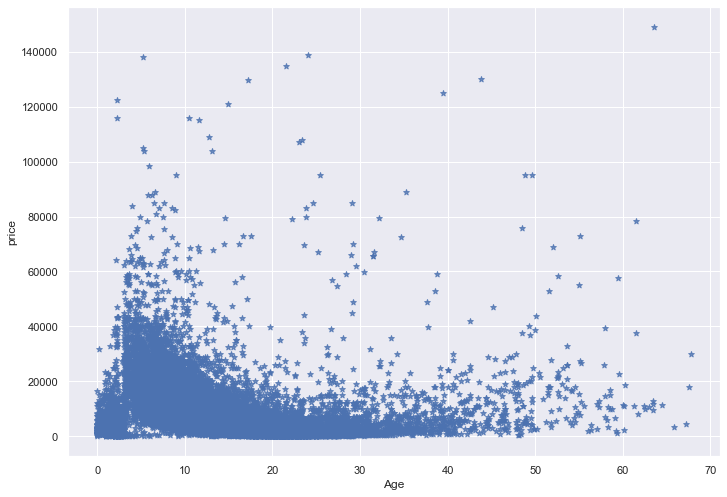

In [50]:
#Age vs price
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,color= None,marker="*",data=cars)

In [51]:
#cars priced higher are newer 
#with in increase in age the price drop
#however some cars are priced hiher with ince=rease in the age

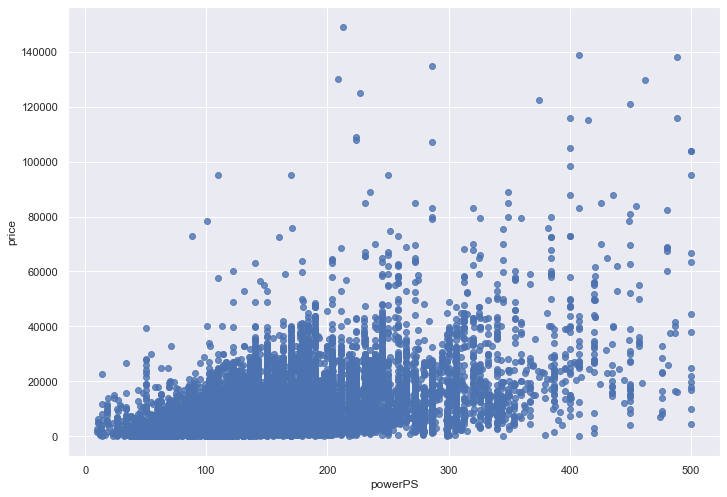

In [52]:
#power ps vs price
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [53]:
#as the power increases the price increase


In [54]:
#variable seller
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [55]:
cars['seller'].head(50)

0     private
1     private
2     private
3     private
4     private
5     private
7     private
8     private
9     private
10    private
11    private
12    private
13    private
14    private
15    private
16    private
17    private
18    private
20    private
21    private
22    private
23    private
24    private
25    private
26    private
27    private
28    private
29    private
30    private
32    private
33    private
34    private
36    private
37    private
38    private
39    private
40    private
41    private
42    private
44    private
45    private
46    private
47    private
48    private
50    private
51    private
52    private
53    private
54    private
55    private
Name: seller, dtype: object

In [56]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller             42772 non-null  object 
 1   offerType          42772 non-null  object 
 2   price              42772 non-null  int64  
 3   abtest             42772 non-null  object 
 4   vehicleType        39896 non-null  object 
 5   gearbox            41978 non-null  object 
 6   powerPS            42772 non-null  int64  
 7   model              41089 non-null  object 
 8   kilometer          42772 non-null  int64  
 9   fuelType           40175 non-null  object 
 10  brand              42772 non-null  object 
 11  notRepairedDamage  36495 non-null  object 
 12  Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 4.6+ MB


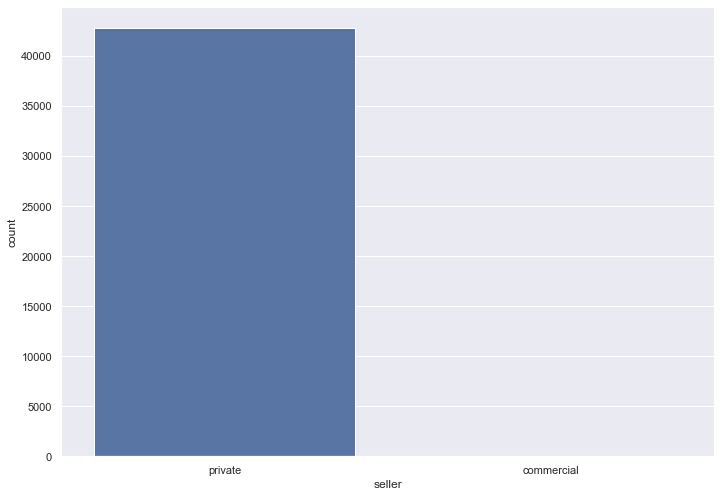

In [58]:
sns.countplot(x='seller',data=cars)

In [59]:
#fewer cars are commertial type=> insignificant

In [60]:
#variable offer type
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

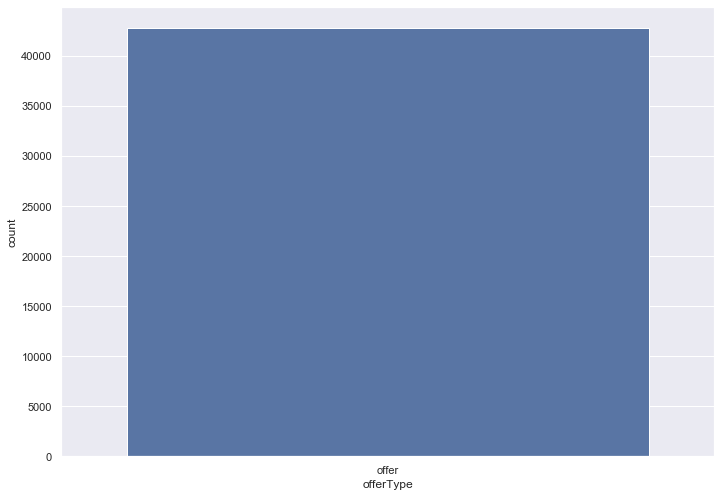

In [61]:
sns.countplot(x='offerType',data=cars)

In [62]:
#all cars have offer type therefore insignifacant

In [63]:
#variable abtest

cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [64]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


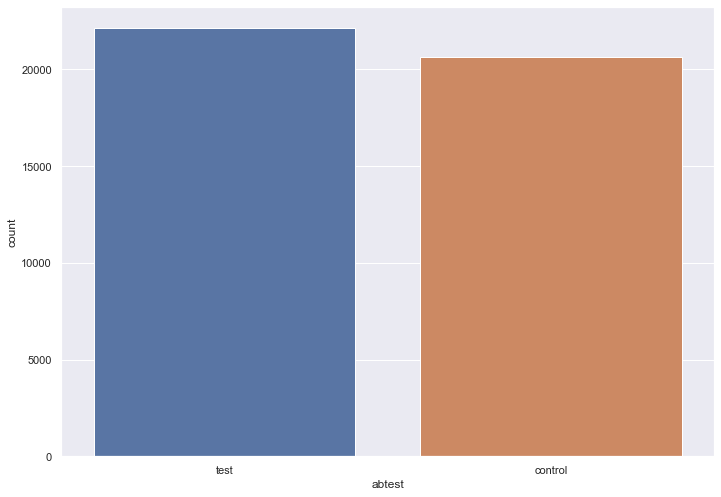

In [65]:
sns.countplot(x='abtest',data=cars)

In [66]:
#equally distributed

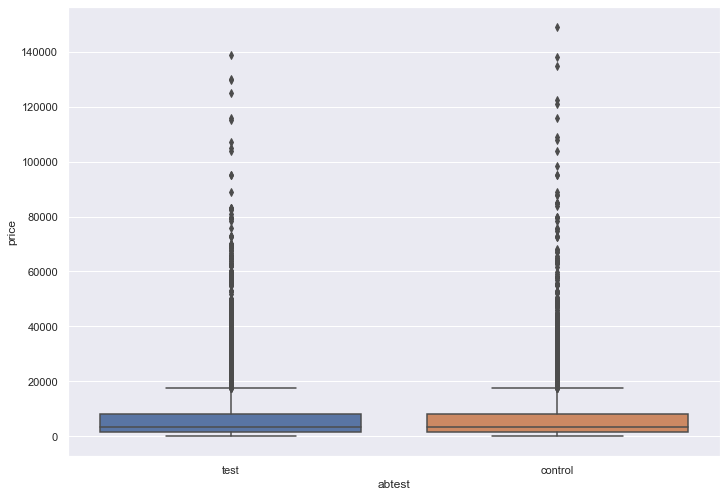

In [67]:
sns.boxplot(x='abtest',y='price',data=cars)

In [68]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [69]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


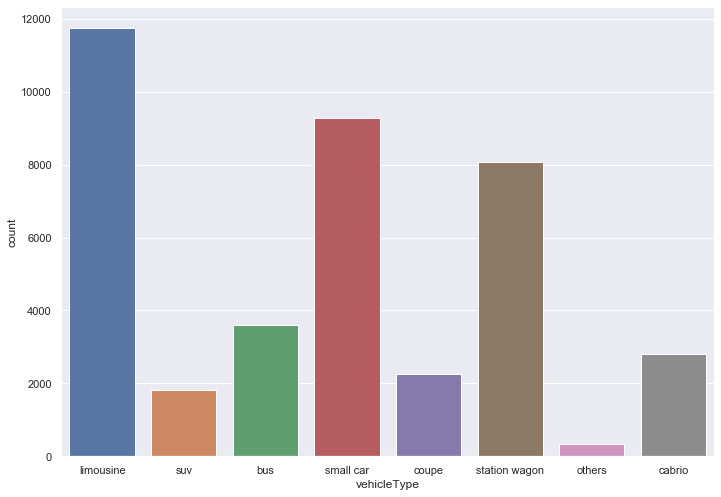

In [70]:
sns.countplot(x='vehicleType',data=cars)

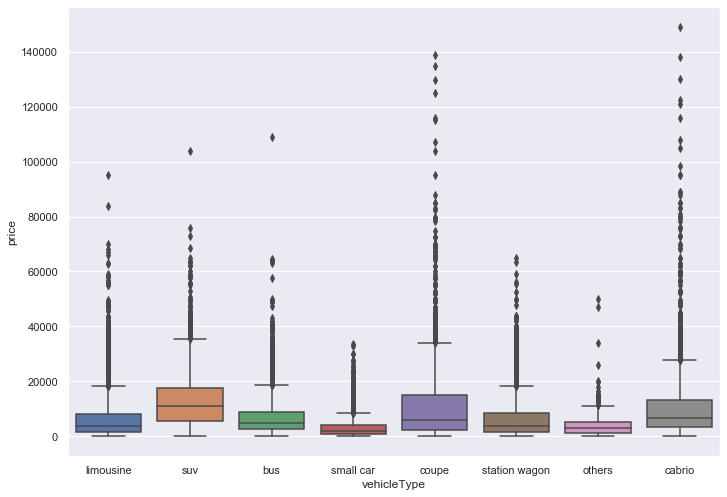

In [71]:
sns.boxplot(x='vehicleType',y='price',data=cars)

In [72]:
#vehicle type effect the price of a car so we will cinsider this parameter
#for furthur analysis

In [73]:
#variable gear box
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [74]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


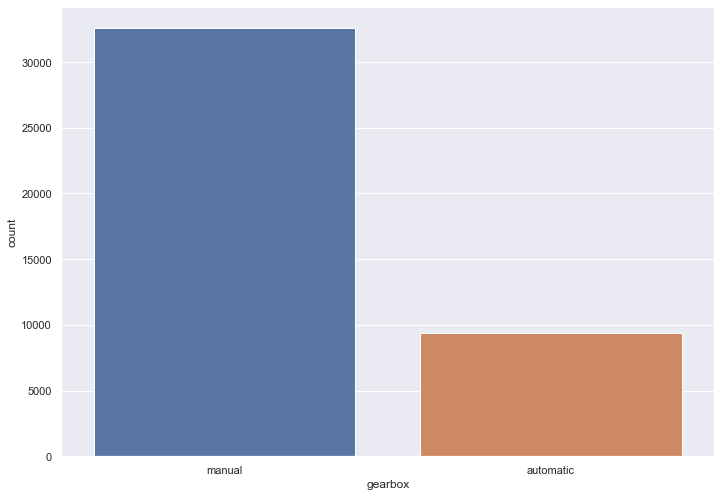

In [75]:
sns.countplot(x='gearbox',data=cars)

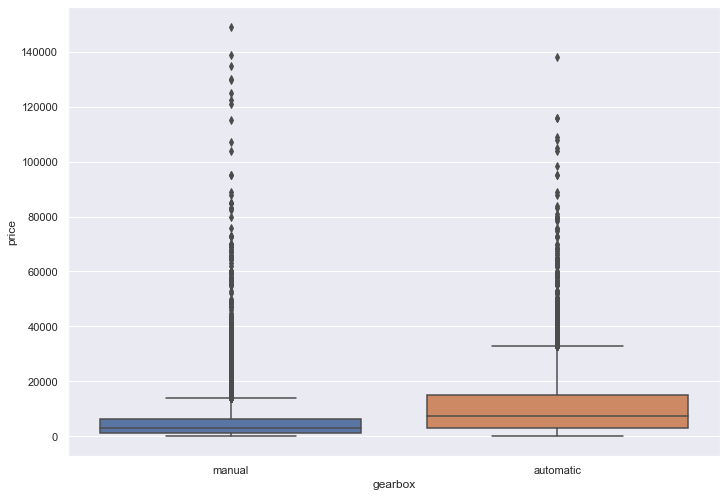

In [76]:
sns.boxplot(x='gearbox',y='price',data=cars)

In [77]:
#gear box affects the price

In [78]:
#variable model
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
charade          1
elefantino       1
rangerover       1
200              1
serie_2          1
Name: model, Length: 247, dtype: int64

In [79]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


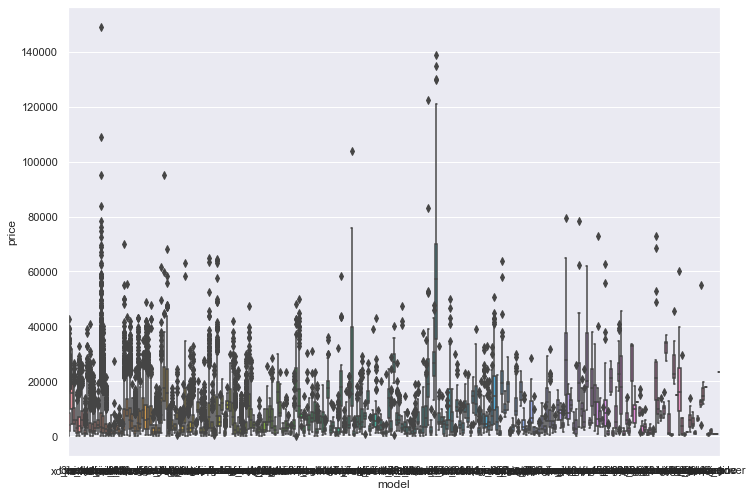

In [80]:
sns.boxplot(x='model',y='price',data=cars)

In [81]:
#model effects the price


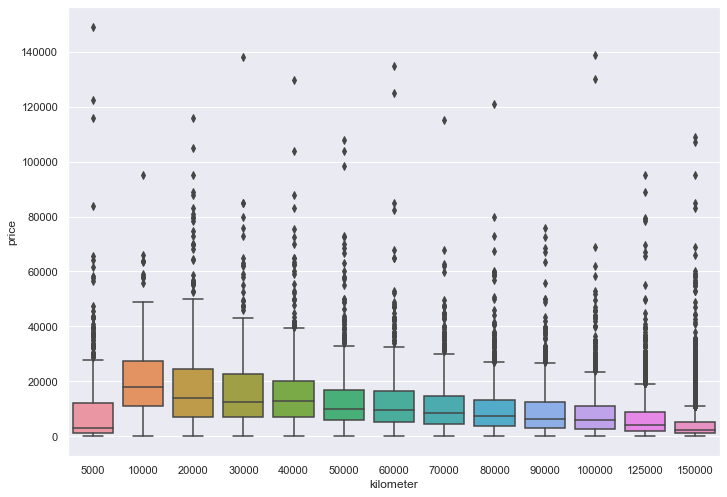

In [82]:
#variable kilometers
sns.boxplot(x='kilometer',y='price',data=cars)
#cosidering in modelling

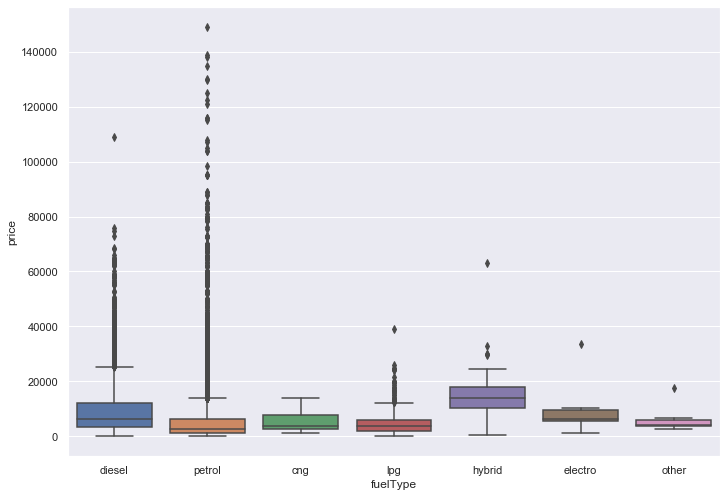

In [83]:
#variable fuel ype
sns.boxplot(x='fuelType',y='price',data=cars)


In [84]:
#consider in modelling

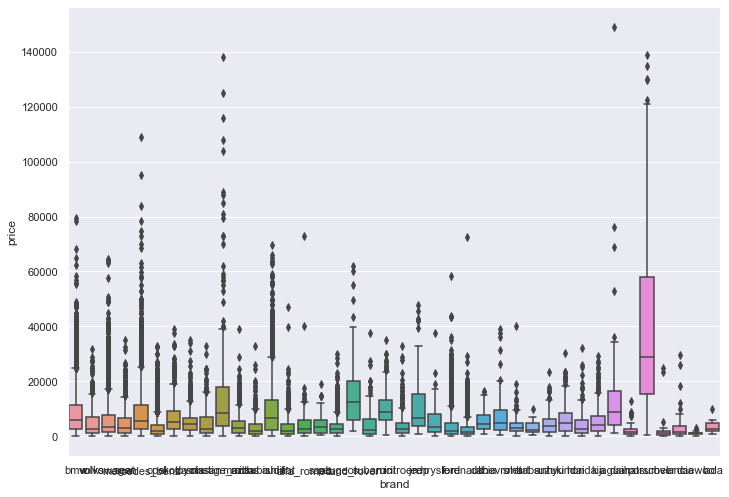

In [85]:
#variable brand
sns.boxplot(x='brand',y='price',data=cars)

In [86]:
# brandconsidered for modelling

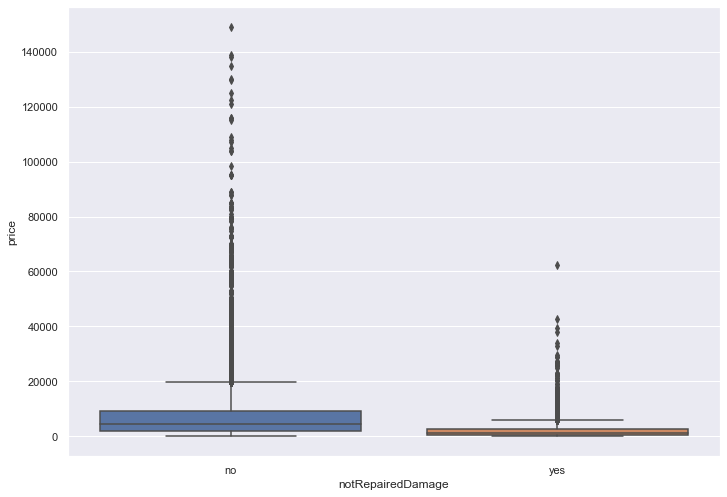

In [87]:
#variable notrepaired damage
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

In [88]:
#consider for modelling


In [89]:
#removing insignificant variables

In [90]:
col=['seller','offerType','abtest']

In [91]:
cars=cars.drop(columns=col,axis=1)

In [92]:
cars_copy=cars.copy()

In [93]:
## correlation

In [94]:
cars_select1=cars.select_dtypes(exclude=[object])

In [95]:
cars_select1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      42772 non-null  int64  
 1   powerPS    42772 non-null  int64  
 2   kilometer  42772 non-null  int64  
 3   Age        42772 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.9 MB


In [96]:
correlation=cars_select1.corr()

In [97]:
print(correlation)

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000


In [98]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [99]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [140]:
#we are going to  build a linear regression and random forrest model

#Data obtained by ommiting rows with any missing value



In [101]:
#ommitting missing values
 
cars_omit=cars.dropna(axis=0)

In [102]:
#conveting categorical variables to dummy variables

cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [103]:
#model building with omitted data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [104]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              42772 non-null  int64  
 1   vehicleType        39896 non-null  object 
 2   gearbox            41978 non-null  object 
 3   powerPS            42772 non-null  int64  
 4   model              41089 non-null  object 
 5   kilometer          42772 non-null  int64  
 6   fuelType           40175 non-null  object 
 7   brand              42772 non-null  object 
 8   notRepairedDamage  36495 non-null  object 
 9   Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 4.8+ MB


In [105]:
cars_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Columns: 301 entries, price to notRepairedDamage_yes
dtypes: float64(1), int64(3), uint8(297)
memory usage: 10.6 MB


In [106]:
cars_omit.shape

(32884, 301)

In [107]:
#separating input and output features
x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

In [108]:
#plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8AB3F2908>,
      dtype=object)

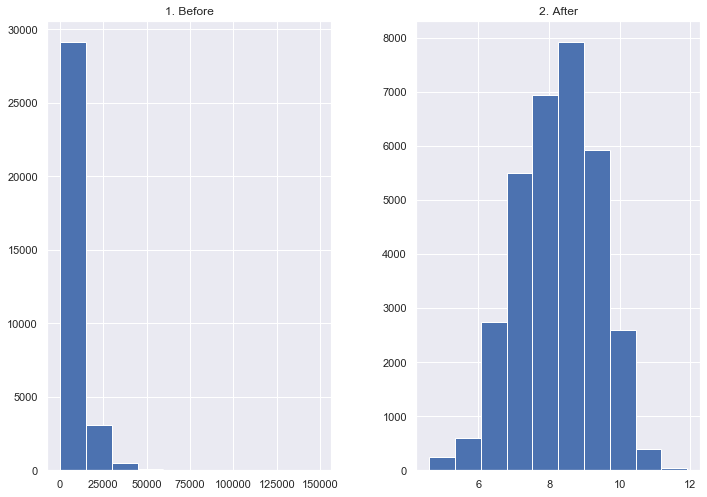

In [109]:
prices.hist()

In [110]:
#transforming price as a logarithimic value
y1= np.log(y1)


In [111]:
#splitting the data into test and train
x_train, x_test,y_train,y_test = train_test_split(x1,y1, test_size=0.3, random_state= 3)

In [113]:
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [114]:
#base line model for  omitted data

#we are making a base model by using test data mean value 
#this is to sett a bench mark and to compare with our regression model


In [115]:
#finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [116]:
#repeating the same value till length of test data
base_pred =np.repeat(base_pred,len(y_test))
print(base_pred)

[8.24961579 8.24961579 8.24961579 ... 8.24961579 8.24961579 8.24961579]


In [117]:
#finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))

print(base_root_mean_square_error)

1.1274483657478247


In [118]:
# LINEAR REGRESSION WITH OMITTED DATA

In [119]:
#SETTING INTRCEPT AS TRUE

lgr=LinearRegression(fit_intercept=True)

print(lgr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [120]:
#model
model_lin1=lgr.fit(x_train,y_train)
print(model_lin1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [121]:
print(model_lin1.coef_)


[ 5.80241090e-03 -7.37954701e-06 -6.59482596e-02  4.17331507e-01
  1.73961993e-01  4.79718892e-02 -7.31765817e-02 -6.46445504e-02
 -1.05674412e-02  2.21906374e-01 -4.97211724e-02 -5.90590735e-01
 -9.45726302e-01 -4.88976488e-02 -1.58646448e-01 -5.33392717e-01
  1.66422431e-13 -1.83653241e-02  2.29502610e-01 -5.44333594e-02
 -7.49628460e-01 -2.04011213e-01  5.13201134e-01  4.88966420e-01
 -7.26653567e-01 -8.74881443e-02  1.32355338e-02 -6.87592056e-01
 -6.99573989e-01 -2.73326865e-01 -2.58981961e-01  3.59682910e-02
  4.78919028e-01 -1.08098244e+00  9.70415751e-02  2.46069052e-01
  4.68173753e-01  1.28705162e-01  2.59362925e-02  2.04160401e-01
  1.36920035e-02 -2.38555061e-01 -7.57764911e-01  3.86481063e-01
 -6.92905473e-01  4.80637378e-01 -2.02522934e-01  4.77389029e-01
 -3.06063502e-02 -3.25217405e-01  2.21609584e-02 -6.54711122e-01
 -1.67439586e-01 -7.58153377e-02 -3.57850965e-01 -1.71592968e-01
 -2.24644193e-01  1.71889033e-01 -2.89296464e-01  7.82770140e-02
 -4.80812963e-01 -8.35057

In [122]:
print(model_lin1.intercept_)

9.636711481592624


In [123]:
model_lin1.coef_.shape

(300,)

In [124]:
x1.shape

(32884, 300)

In [125]:
#predicting model on test set
cars_predictions_lin1 = lgr.predict(x_test)

In [126]:
#computing mse and rmse

lin_mse1=mean_squared_error(y_test,cars_predictions_lin1)


In [127]:
lin_rmse1=np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513822


In [128]:
# R squared mean value
r2_lin_test1=model_lin1.score(x_test,y_test)
r2_lin_train1=model_lin1.score(x_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649259 0.7800936978183916


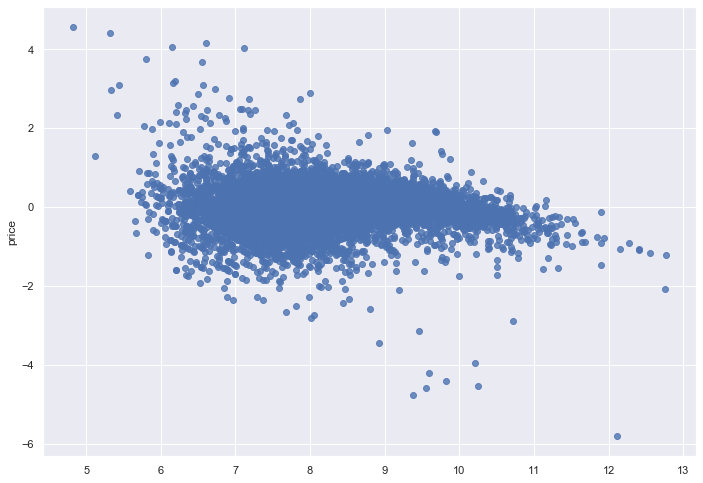

In [129]:
#regression diagnostics_residual plot analysis
residuals1 = y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1,y=residuals1,scatter=True,fit_reg=False)

In [130]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [131]:
#RANDOM FOREST TREE MODEL


In [132]:
#MODEL PARAMETERS

rf =RandomForestRegressor(n_estimators =100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)


In [133]:
#model
model_rf1=rf.fit(x_train,y_train)

In [134]:
#predicting model on test set
cars_predictions_rf1=rf.predict(x_test)

In [135]:
#computing MSE and RMSE

rf_mse1 = mean_squared_error(y_test,cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [136]:
print(rf_rmse1)

0.4360736289370223


In [137]:
#R squared value
r2_rf_test1=model_rf1.score(x_test,y_test)
r2_rf_train1=model_rf1.score(x_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291
